<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Technical-Assignment:-Senior-Data-Scientist,-Product" data-toc-modified-id="Technical-Assignment:-Senior-Data-Scientist,-Product-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Technical Assignment: Senior Data Scientist, Product</a></span></li><li><span><a href="#Data-Exploration-and-Cleaning" data-toc-modified-id="Data-Exploration-and-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration and Cleaning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-What-is-the-Net-Promoter-Score-by-Bank,-and-by-Week" data-toc-modified-id="1.-What-is-the-Net-Promoter-Score-by-Bank,-and-by-Week-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>1. What is the Net Promoter Score by Bank, and by Week</a></span></li><li><span><a href="#2.-Does-the-Net-Promoter-Score-vary-significantly-across-touchpoints/interaction-channels?" data-toc-modified-id="2.-Does-the-Net-Promoter-Score-vary-significantly-across-touchpoints/interaction-channels?-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>2. Does the Net Promoter Score vary significantly across touchpoints/interaction channels?</a></span></li><li><span><a href="#3.-Does-the-Net-Promoter-Score-vary-by-Demographic-characteristics?" data-toc-modified-id="3.-Does-the-Net-Promoter-Score-vary-by-Demographic-characteristics?-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>3. Does the Net Promoter Score vary by Demographic characteristics?</a></span></li><li><span><a href="#4.-Does-the-Response-rate*-vary-significantly-across-any-of-the-characteristics-(Customer-Demographics,-Bank,-Touchpoints,-Week,-Time-of-Day)?" data-toc-modified-id="4.-Does-the-Response-rate*-vary-significantly-across-any-of-the-characteristics-(Customer-Demographics,-Bank,-Touchpoints,-Week,-Time-of-Day)?-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>4. Does the Response rate* vary significantly across any of the characteristics (Customer Demographics, Bank, Touchpoints, Week, Time of Day)?</a></span></li><li><span><a href="#Demographics" data-toc-modified-id="Demographics-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Demographics</a></span></li><li><span><a href="#Bank" data-toc-modified-id="Bank-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>Bank</a></span></li><li><span><a href="#Touchpoints" data-toc-modified-id="Touchpoints-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>Touchpoints</a></span></li><li><span><a href="#5.-What-themes-are-most-associated-with-the-likelihood-to-recommend-a-bank?" data-toc-modified-id="5.-What-themes-are-most-associated-with-the-likelihood-to-recommend-a-bank?-2.0.8"><span class="toc-item-num">2.0.8&nbsp;&nbsp;</span>5. What themes are most associated with the likelihood to recommend a bank?</a></span></li><li><span><a href="#How-would-I-go-about-training-and-deploying-a-multi-label-model-to-classify-the-comments-into-at-least-one-theme,-based-on-the-data-provided-in-the-comment_on_why-and-themes-columns" data-toc-modified-id="How-would-I-go-about-training-and-deploying-a-multi-label-model-to-classify-the-comments-into-at-least-one-theme,-based-on-the-data-provided-in-the-comment_on_why-and-themes-columns-2.0.9"><span class="toc-item-num">2.0.9&nbsp;&nbsp;</span>How would I go about training and deploying a multi-label model to classify the comments into at least one theme, based on the data provided in the comment_on_why and themes columns</a></span></li></ul></li></ul></li></ul></div>

# Technical Assignment: Senior Data Scientist, Product

Background:


Ajua is continuously collecting feedback data from a sample of consumers to better understand
and track the state of customer experience for the financial services sector, and for use in
experimentation and product development. A sample feedback data set, titled FS Feedback Data
is provided.
The data includes some demographic characteristics of the customers, the consent(or lack
thereof) to participate in a survey, the likelihood to recommend, and the reason why, as well as the
date and time of the survey.

In [1]:
# import necessary libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
pd.set_option('display.max_columns', 50)

# Import Plotly Packages
import plotly 

In [2]:
# load in the data
data = pd.read_csv("ajua_data.csv")

In [3]:
data.head(5)

,user_id,year_of_birth,gender,region,living_standards_measure,highest_education,employment,internet_access,cable_tv_subscription,survey_completion,survey_participation_consent,bank_account,bank,last_interaction_with_bank,likelihood_to_recommend,comment_on_why,themes,start_time(GMT),time_of_last_update(GMT)
0,358646,1991.0,Prefer not to answer,NaN,NaN,NaN,Student,Yes,No,TIMEDOUT,-,-,-,-,-,-,NaN,18:34.6,00:09.9
1,18003003,1984.0,Female,coast,5 to 8,Completed Secondary,Student,Yes,Yes,FINISHED,YES,Yes,KCB,Teller or Branch transactions,5,Safrcom don''t allow 1 person to Bank more tha...,speed/efficiency,00:02.9,16:14.6
2,5618870,1994.0,Male,riftvalley,5 to 8,Completed College,Student,Yes,No,FINISHED,YES,Yes,National Bank,Mobile banking,10,They offer good services,service,00:03.0,05:11.0
3,2951848,1995.0,Female,riftvalley,NaN,NaN,Other/Unemployed,Yes,NaN,TIMEDOUT,-,-,-,-,-,-,NaN,00:03.0,00:09.1
4,17386348,1999.0,Male,coast,9 to 12,In Uni,Student,Yes,Yes,FINISHED,YES,Yes,Equity,Teller or Branch transactions,7,Transaction cost are affordable,"account,rates/charges",00:03.0,03:13.8


# Data Exploration and Cleaning

The data seems to have some cells filled up with the symbol "-", meaning no data was recorded in that cell. This will cause errors later on when we're trying to work with the data. We will replace the "-" with NaN to show that there's no data there, then find out how many NaN values we have for each column

In [4]:
#change all the dashes (-) to NA
new_data = data.replace('-', np.NaN)

In [5]:
#checking number of Null values per column
print(new_data.isna().sum())
print("The data has a total of ", len(new_data), "rows.")
print("The data consists of a total of ", len(new_data.columns), "columns.")

user_id                            0
year_of_birth                     45
gender                            31
region                           208
living_standards_measure        1208
highest_education               1122
employment                       124
internet_access                  587
cable_tv_subscription            921
survey_completion                  0
survey_participation_consent    2072
bank_account                    2204
bank                            2773
last_interaction_with_bank      2803
likelihood_to_recommend         2831
comment_on_why                  2865
themes                          3707
start_time(GMT)                    0
time_of_last_update(GMT)           0
dtype: int64
The data has a total of  6464 rows.
The data consists of a total of  19 columns.


The table above shows the number of NaN cells in each column. The only columns that don't have missing data are  `user_id`, `time_of_last_update(GMT)` and `time_of_last_update`.

The data consists of **6464** rows of data with a total of **19** columns 

Next, we identify the datatypes of each column and assign correct datatypes and format.



In [6]:
#checking the datatypes of the columns
print(new_data.dtypes)

user_id                           int64
year_of_birth                   float64
gender                           object
region                           object
living_standards_measure         object
highest_education                object
employment                       object
internet_access                  object
cable_tv_subscription            object
survey_completion                object
survey_participation_consent     object
bank_account                     object
bank                             object
last_interaction_with_bank       object
likelihood_to_recommend          object
comment_on_why                   object
themes                           object
start_time(GMT)                  object
time_of_last_update(GMT)         object
dtype: object


From the above, most columns are identified as objects which are basically strings but columns `year_of_birth`, `likelihood_to_recommend`, `start_time(GMT)`, `time_of_last_update(GMT)` have been assigned wong datatypes. The following steps were taken to chang them accordingly.

In [7]:
new_data['user_id'] = new_data['user_id'].astype(str)

In [8]:
new_data['year_of_birth'] = new_data['year_of_birth'].astype('Int64').astype(str)
new_data['year_of_birth'].dtypes

dtype('O')

In [9]:
new_data['likelihood_to_recommend'] = new_data['likelihood_to_recommend'].astype('float').astype('Int64')
new_data['likelihood_to_recommend'].dtypes

Int64Dtype()

In [10]:
import re

def fix_date(column):
  column = column.str.replace(r'.', r':')
  return column


new_data['start_time(GMT)'] = fix_date(new_data['start_time(GMT)'])
new_data['time_of_last_update(GMT)'] = fix_date(new_data['time_of_last_update(GMT)'])

In [11]:
new_data.dtypes

user_id                         object
year_of_birth                   object
gender                          object
region                          object
living_standards_measure        object
highest_education               object
employment                      object
internet_access                 object
cable_tv_subscription           object
survey_completion               object
survey_participation_consent    object
bank_account                    object
bank                            object
last_interaction_with_bank      object
likelihood_to_recommend          Int64
comment_on_why                  object
themes                          object
start_time(GMT)                 object
time_of_last_update(GMT)        object
dtype: object

Next, we perform a few more data explorations to identify information in the data that might be useful.

In [12]:
#checking number of unique Id's
data['user_id'].nunique()

6454

The data has **6454** unique user id's. Meaning there are **10** user id's that have been duplicated. Let's explore the user_id's with duplicates

In [13]:
# find duplicated Id's
#new_data[new_data.duplicated(['user_id'], keep='first')]


In [14]:
#new_data[new_data.duplicated(['user_id'], keep='last')]

In [15]:
new_data[new_data.duplicated()]

,user_id,year_of_birth,gender,region,living_standards_measure,highest_education,employment,internet_access,cable_tv_subscription,survey_completion,survey_participation_consent,bank_account,bank,last_interaction_with_bank,likelihood_to_recommend,comment_on_why,themes,start_time(GMT),time_of_last_update(GMT)


It seems like the user_id's each have one duplicate row with the same user_id but there are no rows that are duplicates. which probably means these users gave feedback probably at different times or gave different feedback using the same id's

### 1. What is the Net Promoter Score by Bank, and by Week

The following will show steps that I tool to get the NPS by Bank. No analysis was done for NPS by Week since the data that I have only contains time data and not date/week

In [16]:
# drop missing values for likelihood
likelihood_data = new_data[new_data.likelihood_to_recommend != "nan"]

In [17]:
likelihood_data.value_counts(new_data['bank'])

bank
Equity                1338
KCB                   1142
Co-operative           710
Other                  159
National Bank          109
Barclays                38
CBA                     33
Diamond Trust Bank      25
Standard Chartered      24
Stanbic Bank            22
NIC                     18
I&M                     14
dtype: int64

The table above shows the number of feedback comments given for every bank. There are a total of **12** banks mentioned in this dataset.

In [18]:
# ls = likelihood_data.groupby(['bank'])
# ls.likelihood_to_recommend.value_counts()

In [19]:
# the function below calculates the NPS of each bank
def calculate_nps(likelihood):
    detractors, promoters = 0, 0 
    for l in likelihood:
        if l <= 6:
            detractors +=1
        if l >= 9:
            promoters +=1
  
    nps = (float(promoters) / len(likelihood) - float(detractors) / len(likelihood)) * 100
    return nps

In [20]:
banks_nps = likelihood_data.groupby(['bank']).agg(calculate_nps)


# sort df by nps column
banks_nps = banks_nps.sort_values(['likelihood_to_recommend'], ascending= False).reset_index(drop=False)
banks_nps

,bank,likelihood_to_recommend
0,CBA,57.575758
1,Standard Chartered,37.500000
2,Other,35.849057
3,I&M,35.714286
4,Stanbic Bank,31.818182
5,Co-operative,26.901408
6,KCB,24.956217
7,Equity,24.588939
8,Diamond Trust Bank,24.000000
9,Barclays,15.789474


The table above shows the NPS by bank

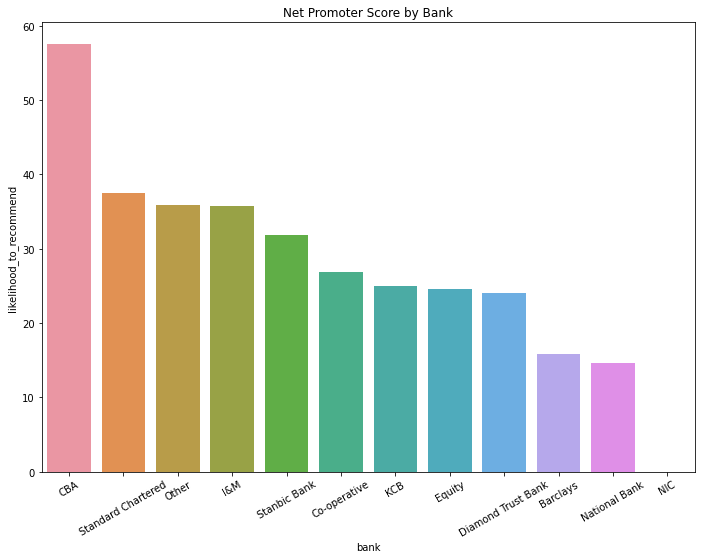

In [21]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

fig = sns.barplot(ax = ax, x = 'bank', y='likelihood_to_recommend', data=banks_nps).set_title('Net Promoter Score by Bank')
ax.set_xticklabels(banks_nps.bank)
for item in ax.get_xticklabels(): item.set_rotation(30)

The diagram above shows that CBA has the highest NPS Score and NIC has the lowest NPS score at 0. meaning that their % of promoters and % of detractors are the same.

In [22]:
import statistics
print("The mean of sample is % s " 
                % (statistics.mean(banks_nps.likelihood_to_recommend))) 
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(banks_nps.likelihood_to_recommend))) 

The mean of sample is 27.44768490057114 
Standard Deviation of sample is 14.288160253113123 


### 2. Does the Net Promoter Score vary significantly across touchpoints/interaction channels?

In [26]:
channels_nps = likelihood_data.groupby(['last_interaction_with_bank']).agg(calculate_nps)

# sort df by nps column
channels_nps = channels_nps.sort_values(['last_interaction_with_bank'], ascending= False).reset_index(drop=False)
channels_nps

,last_interaction_with_bank,likelihood_to_recommend
0,Teller or Branch transactions,13.866667
1,Social media,17.857143
2,Other,17.241379
3,Mobile banking,32.249322
4,Internet banking,41.538462
5,Insurance,-50.000000
6,Customer service desk/ enquiries,35.928144
7,Call centre,16.666667
8,Bank agent/ agency banking,22.314050
9,ATM,27.021494


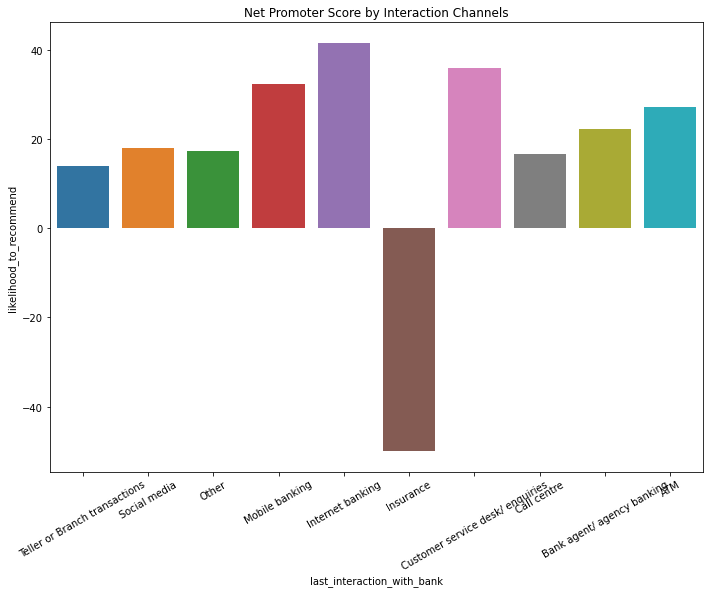

In [27]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

fig = sns.barplot(ax = ax, x = 'last_interaction_with_bank', y='likelihood_to_recommend', data=channels_nps).set_title('Net Promoter Score by Interaction Channels')

ax.set_xticklabels(channels_nps.last_interaction_with_bank)
for item in ax.get_xticklabels(): item.set_rotation(30)

The diagram above shows the Net Promoter Score by the last interaction channels with the bank and how the score vares across these different interaction channels.

In [28]:
print("The mean of sample is % s " 
                % (statistics.mean(channels_nps.likelihood_to_recommend))) 
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(channels_nps.likelihood_to_recommend))) 

The mean of sample is 17.46833272023812 
Standard Deviation of sample is 25.427785588427547 


### 3. Does the Net Promoter Score vary by Demographic characteristics?

In [30]:
region_nps = likelihood_data.groupby(['region']).agg(calculate_nps)

# sort df by nps column
region_nps = region_nps.sort_values(['region'], ascending= False).reset_index(drop=False)
region_nps

,region,likelihood_to_recommend
0,western,27.622378
1,riftvalley,30.833333
2,nyanza,26.012793
3,northeastern,-5.555556
4,nairobi,16.978417
5,eastern,27.164179
6,coast,16.239316
7,central,23.671498
8,Nairobi,10.526316
9,Coast,100.000000


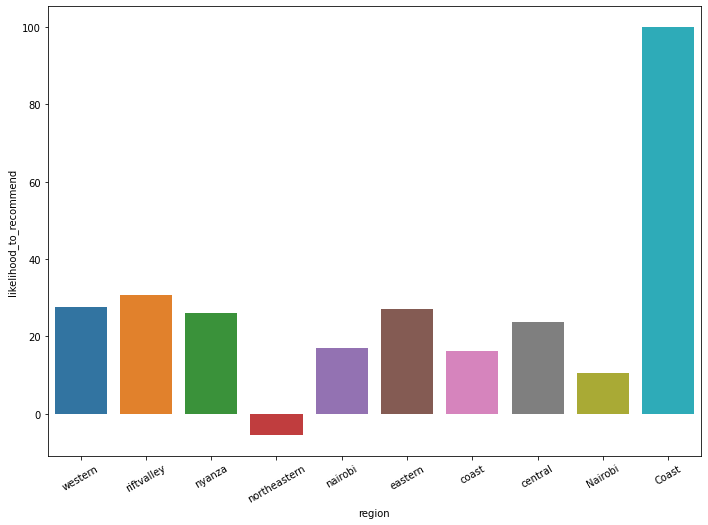

In [31]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

fig = sns.barplot(ax = ax, x = 'region', y='likelihood_to_recommend', data=region_nps)

ax.set_xticklabels(region_nps.region)
for item in ax.get_xticklabels(): item.set_rotation(30)

In [32]:
print("The mean of sample is % s " 
                % (statistics.mean(region_nps.likelihood_to_recommend))) 
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(region_nps.likelihood_to_recommend))) 

The mean of sample is 27.349267456112333 
Standard Deviation of sample is 27.69358787737474 


The above plots and calculations show that the Net Promoter Score grouped by demographic chanacteristics, varies more than those grouped by interaction touchpoints.

### 4. Does the Response rate* vary significantly across any of the characteristics (Customer Demographics, Bank, Touchpoints, Week, Time of Day)?

### Demographics

In [111]:
new_data['region'] = new_data['region'].str.lower()

In [112]:
l = new_data.groupby(['region'])
pct = l.survey_completion.value_counts().reset_index(name = 'count')

<AxesSubplot:xlabel='region', ylabel='count'>

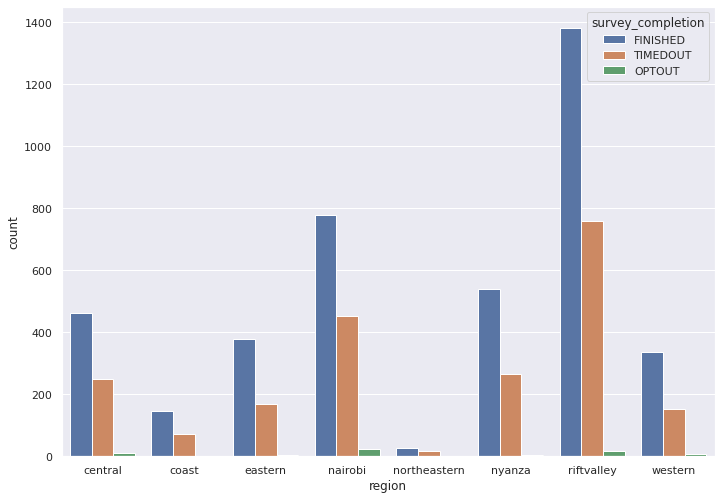

In [122]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(x = 'region', y= 'count',
            hue = 'survey_completion',data=pct)

# ax.set_xticklabels(pct.region)
# for item in ax.get_xticklabels(): item.set_rotation(30)

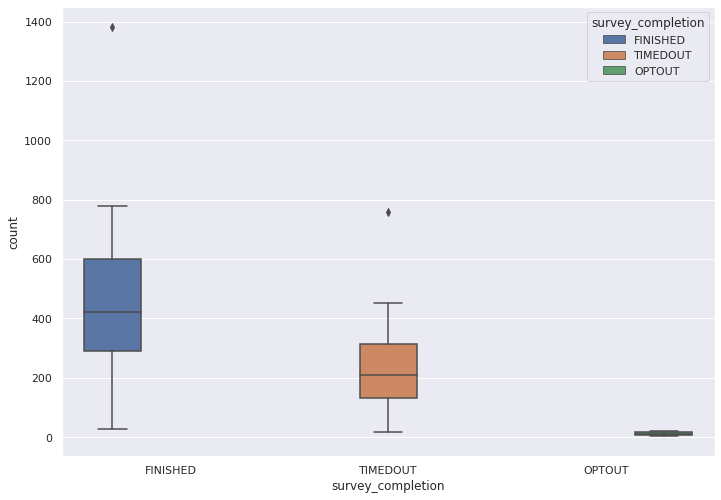

In [124]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

fig = sns.boxplot(x = 'survey_completion', y= 'count',
            hue = 'survey_completion',data=pct)

### Bank

In [129]:
l = new_data.groupby(['bank'])
pct = l.survey_completion.value_counts().reset_index(name = 'count')

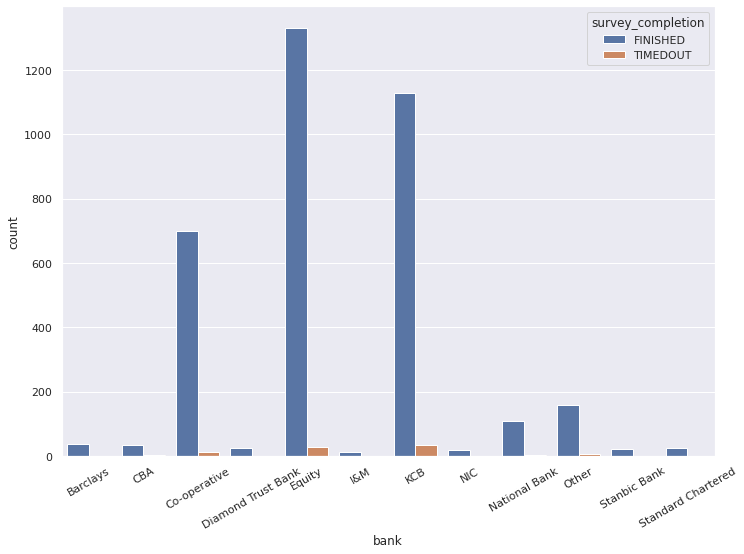

In [134]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

fig = sns.barplot(x = 'bank', y= 'count',
            hue = 'survey_completion',data=pct)

ax.set_xticklabels(pct['bank'].unique())
for item in ax.get_xticklabels(): item.set_rotation(30)

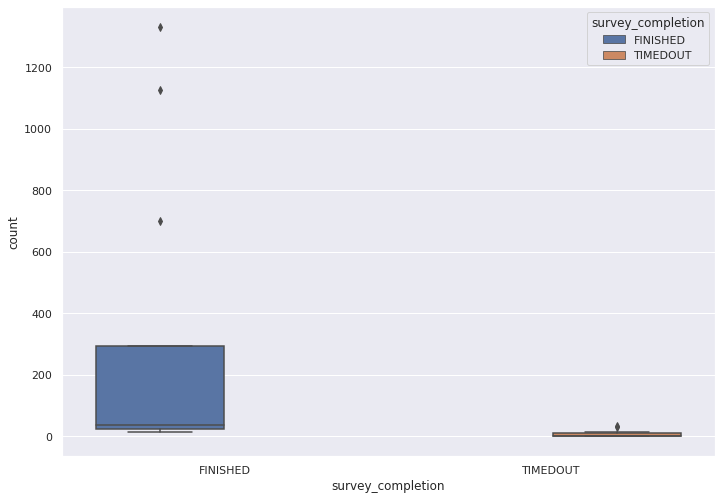

In [135]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

fig = sns.boxplot(x = 'survey_completion', y= 'count',
            hue = 'survey_completion',data=pct)


### Touchpoints

In [138]:
l = new_data.groupby(['last_interaction_with_bank'])
pct = l.survey_completion.value_counts().reset_index(name = 'count')
pct

,last_interaction_with_bank,survey_completion,count
0,ATM,FINISHED,971
1,ATM,TIMEDOUT,13
2,Bank agent/ agency banking,FINISHED,481
3,Bank agent/ agency banking,TIMEDOUT,8
4,Call centre,FINISHED,18
5,Customer service desk/ enquiries,FINISHED,165
6,Customer service desk/ enquiries,TIMEDOUT,5
7,Insurance,FINISHED,8
8,Internet banking,FINISHED,63
9,Internet banking,TIMEDOUT,2


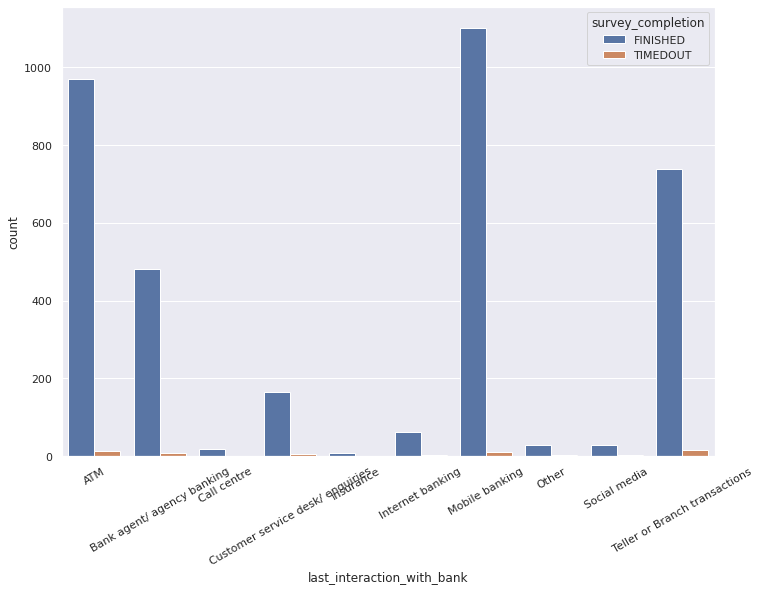

In [139]:

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

fig = sns.barplot(x = 'last_interaction_with_bank', y= 'count',
            hue = 'survey_completion',data=pct)

ax.set_xticklabels(pct['last_interaction_with_bank'].unique())
for item in ax.get_xticklabels(): item.set_rotation(30)

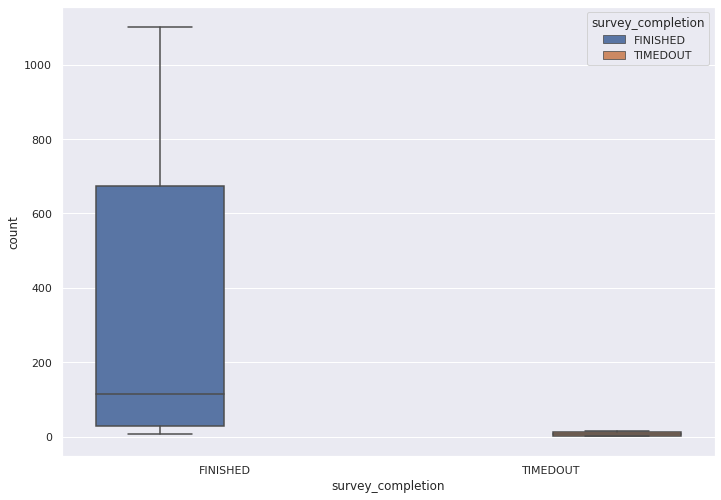

In [140]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

fig = sns.boxplot(x = 'survey_completion', y= 'count',
            hue = 'survey_completion',data=pct)

From the box plots that have been shown above, it is clear that the response rate varies across those categories

### 5. What themes are most associated with the likelihood to recommend a bank?

In [91]:
# drop missing values for likelihood
themes_data = new_data.dropna()

In [92]:
themes_data['themes'].value_counts()

service                                                        708
speed/efficiency                                               329
service,speed/efficiency                                       232
accessibility                                                  156
accessibility,speed/efficiency                                  71
                                                              ... 
resolved                                                         1
accessibility,atm,mobile_banking,speed/efficiency,system         1
mobile_banking,rates/charges,security                            1
accessibility,mobile_banking,service,speed/efficiency,staff      1
atm,staff                                                        1
Name: themes, Length: 180, dtype: int64

In [93]:
len(themes_data)

2225

In [94]:
#Reindex and repeat cols on len of split and reset index
df1 = themes_data.reindex(themes_data.index.repeat(themes_data['themes'].fillna("").str.split(',').apply(len)))
df1 = df1.drop(['themes'],1)

# Splitting both cols
s = new_data['themes'].str.split(',', expand=True).stack().reset_index(level=1,drop=True)

# Now grouping the series and df using cumcount.
df1 = df1.set_index(df1.groupby(df1.index).cumcount(), append=True)
s = s.to_frame('themes').set_index(s.groupby(s.index).cumcount(), append=True)

# Joining the all of them together and reset index.
df1 = df1.join(s, how='outer').reset_index(level=[0,1],drop=True)

len(df1)

4118

In [103]:
df1['themes'].value_counts()

service                      1478
speed/efficiency             1019
accessibility                 543
rates/charges                 219
account                       201
staff                         197
mobile_banking                 99
security                       96
atm                            68
loan                           57
system                         48
facilities                     44
information/communication      28
online_banking                 18
resolved                        1
new product                     1
affordability                   1
Name: themes, dtype: int64

In [98]:
#! pip install plotly_express

In [100]:
l = df1.groupby(['likelihood_to_recommend'])
pct = l.themes.value_counts().reset_index(name = 'count')
pct

,likelihood_to_recommend,themes,count
0,0,service,8
1,0,speed/efficiency,5
2,0,accessibility,3
3,0,account,3
4,0,mobile_banking,2
...,...,...,...
121,10,system,10
122,10,atm,9
123,10,information/communication,7
124,10,facilities,4


In [106]:
pct[pct['likelihood_to_recommend'] == 10]

,likelihood_to_recommend,themes,count
112,10,service,366
113,10,speed/efficiency,243
114,10,accessibility,129
115,10,rates/charges,43
116,10,staff,42
117,10,account,40
118,10,security,29
119,10,mobile_banking,17
120,10,loan,15
121,10,system,10


<AxesSubplot:xlabel='likelihood_to_recommend'>

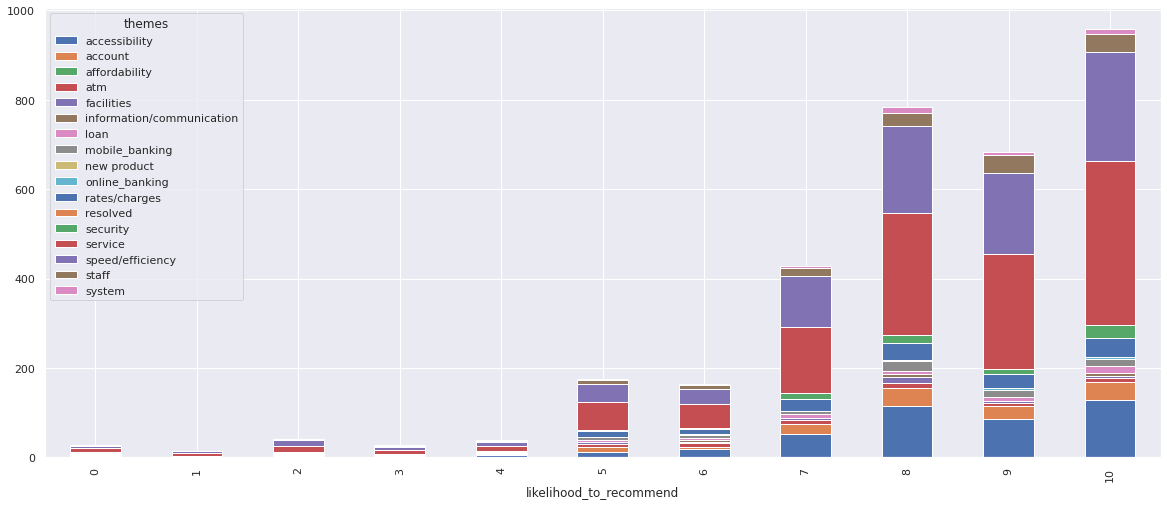

In [97]:
import plotly.express as px
 
df_plot = df1.groupby(['likelihood_to_recommend', 'themes']).size().reset_index().pivot(columns='themes', index='likelihood_to_recommend', values=0)
df_plot.plot(kind='bar', stacked=True)


From the plot and the table above it seems like the themes associated with the likelihood to recommend a bank are **service**, **speed/efficiency** and **accessibility**

### How would I go about training and deploying a multi-label model to classify the comments into at least one theme, based on the data provided in the comment_on_why and themes columns

For this particular task, I will first have to flatten the column themes such that each theme is on its own column and the value underneath each theme is either a 1 or 0 showing whether a particular comment has that theme or not. 

I would then convert the comments into numerical vectors using **TF-IDF** which gives the value of how frequent a word is in a document multiplied by how unique the word is with respect to the entire corpus document. The words with high tf-idf score occur frequently in the document and provide most information about that specific document. I would then split the dataset into train and test and validation sets, using about 70% of the data to train and keeping the rest to test and validate the final model to see if the model generalized well on the data.

There are various multi-label classification techniques. One method is with the use of the Multilabel KNN Classification algorithm, test the model using the validation set and when satisfied, finally test the model with the test set and get results and save the model to be used in the deployment phase.

To deploy the application I would utilise **Streamlit** as the framework used to develop the graphical user interface to utilize the models. I would select streamlit mainly for three reasons. First, the framework is an installable Python library with built-in functions this means that the model can be incorporated into the interface efficiently without issues of language compatibility. Second, unlike other interface frameworks, Streamlit is intuitive to work with, only requires a few lines to implement complex features. Finally, deployment can be easily done through the Streamlit website, through a few simple steps. Allowing for a successful online deployment without too many restrictions.

For the Graphical user interface, I would have a section where one would enter a comment, the comment is then passed through them model and it then outputs the theme(s) that have been predicted to be based on that particular comment. 